In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

In [12]:
dataset=pd.read_csv('IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
dataset.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
label_encoder = LabelEncoder()
dataset['sentiment'] = label_encoder.fit_transform(dataset['sentiment'])

In [16]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [17]:
dataset.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [18]:

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()


corpus = []
for review in dataset['review'][:50000]:
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    corpus.append(' '.join(review))

In [19]:
corpus

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

In [20]:
stop_words = set(stopwords.words('english'))
ss = SnowballStemmer(language='english')


scorpus = []
for review in dataset['review'][:50000]:
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower().split()
    review = [ss.stem(word) for word in review if word not in stop_words]
    scorpus.append(' '.join(review))

scorpus

['one review mention watch oz episod hook right exact happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darke

In [21]:
corpus_vocab_size = len(set(' '.join(corpus).split()))
print(f"Vocabulary size after PorterStemmer: {corpus_vocab_size}")
corpus_word_freq = Counter(' '.join(corpus).split())
top_30_corpus = corpus_word_freq.most_common(30)

Vocabulary size after PorterStemmer: 69017


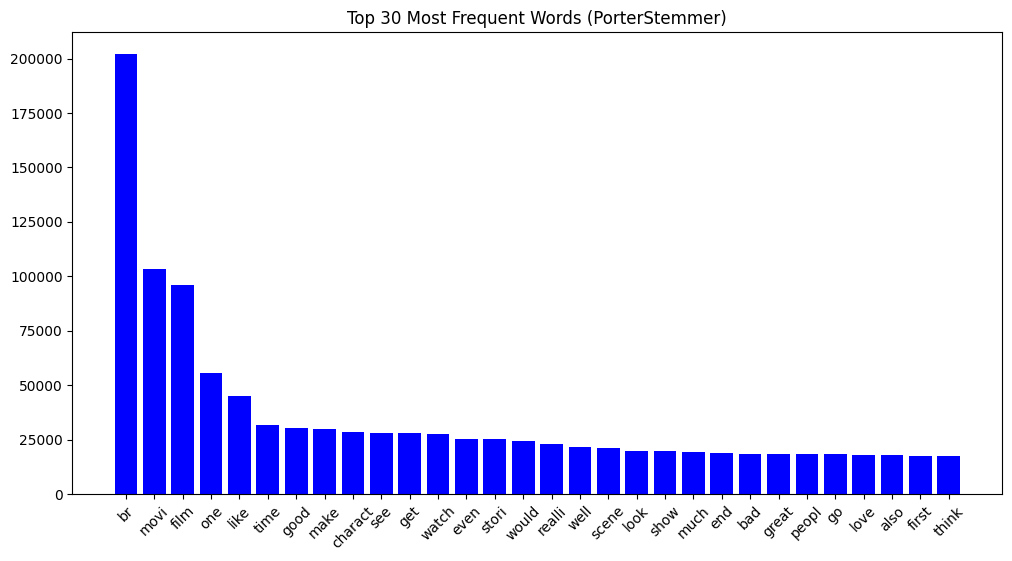

In [22]:
plt.figure(figsize=(12, 6))
plt.bar([word for word, freq in top_30_corpus], [freq for word, freq in top_30_corpus], color='blue')
plt.title('Top 30 Most Frequent Words (PorterStemmer)')
plt.xticks(rotation=45)
plt.show()

In [23]:
corpus_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(corpus))

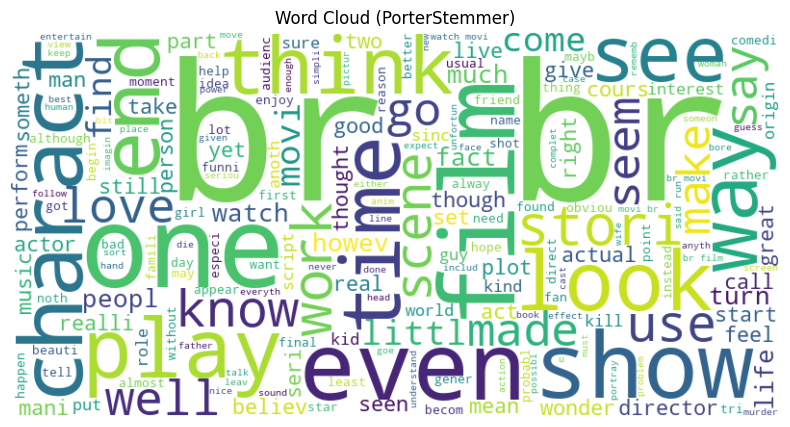

In [24]:
plt.figure(figsize=(10, 5))
plt.imshow(corpus_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (PorterStemmer)')
plt.show()

In [25]:
scorpus_vocab_size = len(set(' '.join(scorpus).split()))
print(f"Vocabulary size after SnowballStemmer: {scorpus_vocab_size}")
scorpus_word_freq = Counter(' '.join(scorpus).split())
top_30_scorpus = scorpus_word_freq.most_common(30)

Vocabulary size after SnowballStemmer: 68209


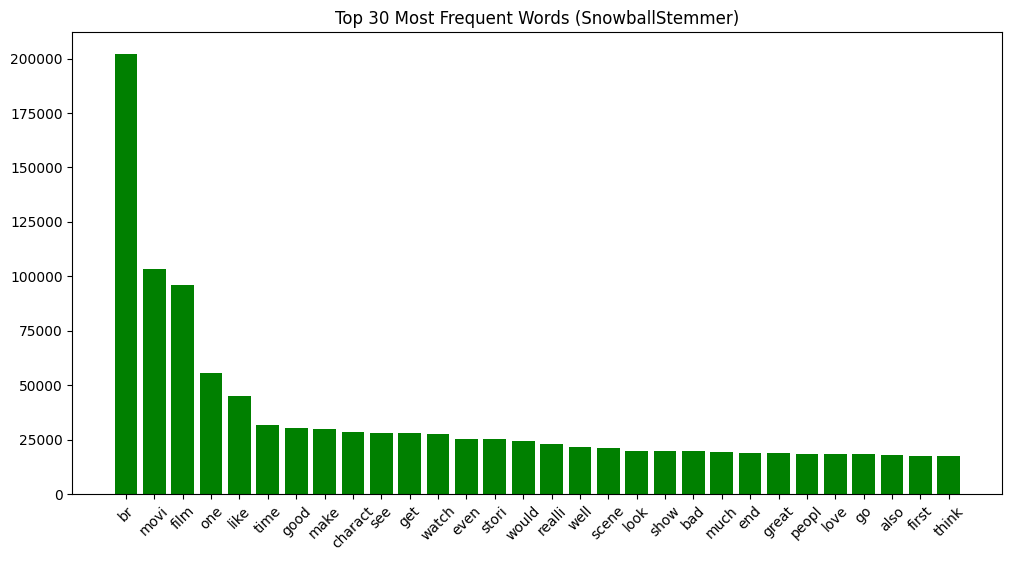

In [26]:
plt.figure(figsize=(12, 6))
plt.bar([word for word, freq in top_30_scorpus], [freq for word, freq in top_30_scorpus], color='green')
plt.title('Top 30 Most Frequent Words (SnowballStemmer)')
plt.xticks(rotation=45)
plt.show()

In [27]:
scorpus_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(scorpus))

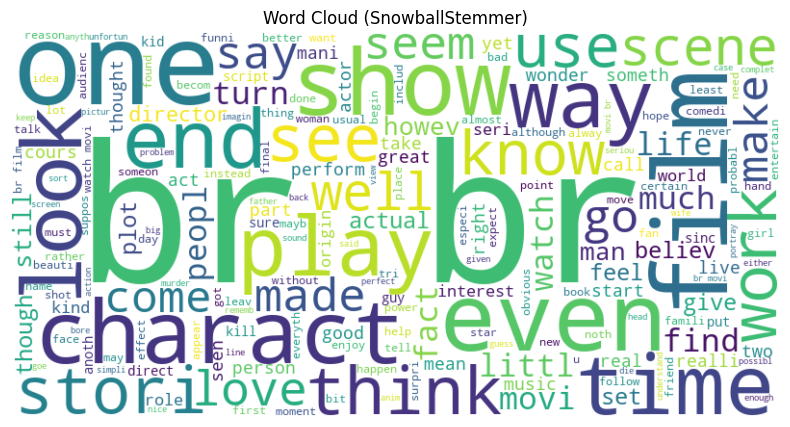

In [28]:
plt.figure(figsize=(10, 5))
plt.imshow(scorpus_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (SnowballStemmer)')
plt.show()

In [29]:
print("Analysis:")
print(f"The vocabulary size after PorterStemmer is {corpus_vocab_size}, while after SnowballStemmer it is {scorpus_vocab_size}.")
print("PorterStemmer tends to produce a smaller vocabulary size as it is more aggressive in stemming.")
print("SnowballStemmer retains slightly more unique words, which may preserve more information.")
print("The bar plots and word clouds show the frequency and distribution of words, highlighting differences in vocabulary richness.")

Analysis:
The vocabulary size after PorterStemmer is 69017, while after SnowballStemmer it is 68209.
PorterStemmer tends to produce a smaller vocabulary size as it is more aggressive in stemming.
SnowballStemmer retains slightly more unique words, which may preserve more information.
The bar plots and word clouds show the frequency and distribution of words, highlighting differences in vocabulary richness.
